# CIGO Data scientist Challenge

## Motivación 

Somos un centro de Transformación Digital Interna que busca de manera innovadora mejorar los procesos del Banco adoptando prácticas ágiles

Nos encargamos de impulsar las iniciativas de los funcionarios como si fueran Emprendedores, Tomamos el concepto de incubadoras acompañándolos y empoderándolos  para que sus iniciativas sean materializadas con mínimas soluciones viables, rápidas y eficientes.

En CIGO buscamos explorar nuevas iniciativas  con Inteligencia artificial que nos permita aumentar la productividad y los espacios de trabajo de tal forma podamos tener un crecimiento exponencial en ingresos y disminución de costos administrativos, en el equipo CIGO buscamos transformar el Banco con nuevas tendencias tecnológicas y nuevas formas de trabajo.

## Consigna 

El objetivo de este desafío consiste en utilizar un conjunto de datos proporcionados

El cual consiste en textos generados tanto por Modelos de Lenguaje Largos (LLM) tales como Chatgpt, Llama2 entre otros, como por autores humanos.  El reto es doble:

### Análisis de estilo: 

Realizar el proceso de exploración y análisis sobre los textos para cada texto (EDA), logrando identificar elementos o aspectos distintivos en el estilo de texto generado por los LLMs en comparación con los creados por los humanos.

In [414]:
#libreriaa necesarias
import nltk
nltk.download('stopwords')
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer  
import matplotlib.pyplot as plt
import re
import string




[nltk_data] Downloading package stopwords to /home/sergio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [415]:
#importamos los datos
data=pd.read_excel("database_clean.xlsx")

### Prerocesamiento de los datos

In [416]:
# Se corrigen algunos caracteres existentes en los textos, como lo son errores en lectura de tíldes y simbolos caracteristicos usados en tweets
def prerpocesamiento(texto):
    diccionario_tildes= {
        "Ã¡": "á",
        "Ã©": "é",
        "Ã": "í",
        "Ã³": "ó",
        "Ãº": "ú",
        "Ã±": "ñ",
    }
    for mal_codificado, bien_codificado in diccionario_tildes.items():
        texto = texto.replace(mal_codificado, bien_codificado)

    #preprocesamiento para los tweets
    # remover el símbolo de retweet "rt"
    texto = re.sub(r'^RT[\s]+', '', texto)
    # remover los liks
    texto = re.sub(r'https?://[^\s\n\r]+', '', texto)

    # remover hashtags
    # osolo se remueven los # de las palabras
    texto = re.sub(r'#', '', texto)
    texto=texto.lower()


    return texto

data.drop_duplicates(inplace=True)
#Corrección de caracteres existentes en los textos
data["Texto"]=data["Texto"].str.replace('\xad', '')
#Correccipón de tíldes
data["Texto"]=data["Texto"].apply(prerpocesamiento)



In [417]:
data['type']= data["Clasificacion"].replace(["LLM","Human"],[1,0])

In [418]:
data["Tipo de fuente"].unique()

array(['Cuentos', 'Ensayos', 'Fabulas', 'Noticias', 'Poemas', 'Tweets'],
      dtype=object)

In [419]:
from nltk.stem import SnowballStemmer
spanish_stemmer = SnowballStemmer('spanish')


In [420]:
import re

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()




corpus = []


text = list(data['Texto'])

for i in range(len(text)):

    r = re.sub('[^a-zA-Z]', ' ', text[i])

    r = r.lower()

    r = r.split()

    r = [word for word in r if word not in stopwords.words('spanish')]

    r = [spanish_stemmer.stem(word) for word in r]

    r = ' '.join(r)

    corpus.append(r)

data['text'] = corpus

[nltk_data] Downloading package wordnet to /home/sergio/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [421]:
data

,Texto,Tipo de fuente,Clasificacion,type,text
0,el rey de los animales se reunieron los animal...,Cuentos,Human,0,rey animal reun animal mont eleg rey hac d as ...
1,domingo 7 había una vez dos compadres jorobado...,Cuentos,Human,0,doming hab vez dos compadr jorob ric pobr ric ...
2,francisco el hombre en los albores del siglo x...,Cuentos,Human,0,francisc hombr albor sigl xx dos comerci orig ...
3,aminta peláez- la leyenda de wareke hace muchí...,Cuentos,Human,0,amint pel ez leyend warek hac much sim inici p...
4,el oasis de belissama atlaua paseaba con belis...,Cuentos,Human,0,oasis belissam atlau pas belissam ancian cabal...
...,...,...,...,...,...
3833,la educación cívica es fundamental para la con...,Tweets,LLM,1,educaci n c vic fundamental construcci n socie...
3839,la corrupción es una amenaza para la democraci...,Tweets,LLM,1,corrupci n amenaz democraci desarroll pa s tom...
3841,el sistema político necesita una reforma profu...,Tweets,LLM,1,sistem pol tic necesit reform profund garantic...
3844,la violencia y la delincuencia son una amenaza...,Tweets,LLM,1,violenci delincuent amenaz segur ciudadan bien...


In [404]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data["text"],
                                                    data["type"],
                                                    test_size=0.33,
                                                    random_state=42)

In [405]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

vectorizer= CountVectorizer(ngram_range=(1,2)).fit(X_train)
X_train_vectorized =vectorizer.transform(X_train)
X_train_vectorized.toarray().shape

model=MultinomialNB(alpha=0.1)
model.fit(X_train_vectorized,y_train)

predictions= model.predict(vectorizer.transform(X_test))

In [406]:
predictions

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,

<Axes: >

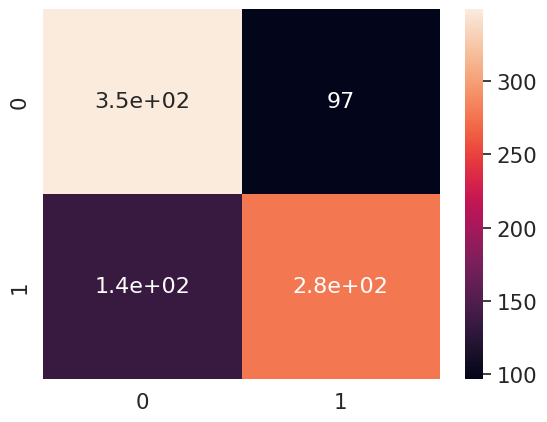

In [407]:
from sklearn import metrics
array = metrics.confusion_matrix(y_test, predictions)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df_cm = pd.DataFrame(array)

sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})

In [408]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

print("the accuracy from Nave Bayes model is "+ str(accuracy_score(y_test, predictions)))
print("the recall from Nave Bayes model is "+ str(recall_score(y_test, predictions)))

the accuracy from Nave Bayes model is 0.729918509895227
the recall from Nave Bayes model is 0.6731234866828087


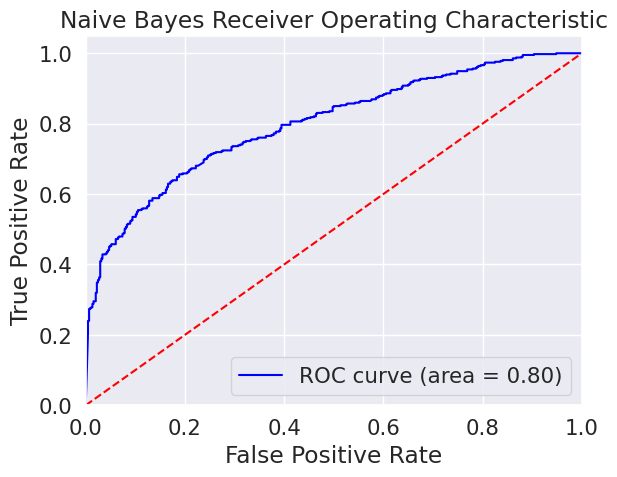

In [409]:
from sklearn.metrics import roc_curve,auc

y_pred_proba=model.predict_proba(vectorizer.transform(X_test))[:, 1]

fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
roc_auc = auc(fpr, tpr)
# Graficar la curva ROC
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle= '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [410]:
from sklearn.svm import SVC
model_svm=SVC(C=1.0,kernel="linear",probability=True)
model_svm.fit(X_train_vectorized,y_train)
y_pred_svm=model_svm.predict(vectorizer.transform(X_test))


<Axes: >

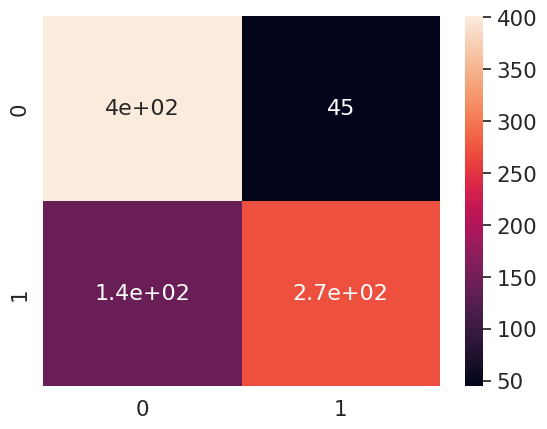

In [411]:
array = metrics.confusion_matrix(y_test, y_pred_svm)
df_cm = pd.DataFrame(array)

sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})

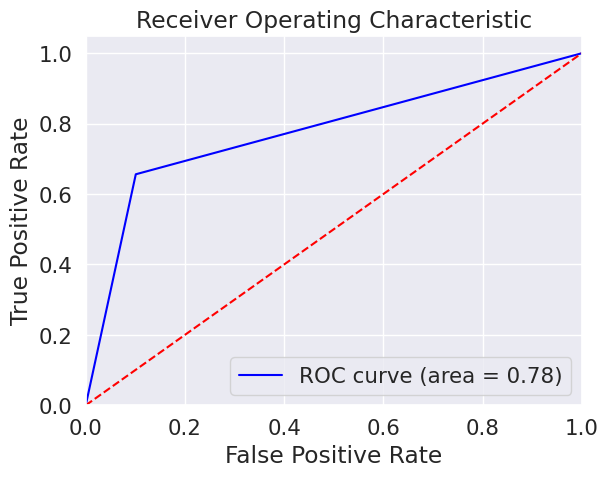

In [412]:
from sklearn.metrics import roc_curve,auc

y_pred_proba=model_svm.predict_proba(vectorizer.transform(X_test))[:, 1]

fpr,tpr,thresholds=roc_curve(y_test,y_pred_svm)
roc_auc=auc(fpr,tpr)

roc_auc = auc(fpr, tpr)
# Graficar la curva ROC
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle= '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [413]:
print("the accuracy from Nave Bayes model is "+str(accuracy_score(y_test, y_pred_svm)))
print("the recall from Nave Bayes model is "+ str(recall_score(y_test, y_pred_svm)))

the accuracy from Nave Bayes model is 0.7823050058207218
the recall from Nave Bayes model is 0.6561743341404358


In [221]:
stop_words = set(stopwords.words('spanish'))

In [222]:
def numero_stop_words(texto):
    texto=word_tokenize(texto)
    stopwords_x = [w for w in texto if w in stop_words]
    num_stopw=len(stopwords_x)
    return num_stopw

def numero_palabras_unicas(texto):
    texto=word_tokenize(texto)
    unicos = len([*set(texto)])
    return unicos

def numero_puntuacion(texto):
    texto=word_tokenize(texto)
    puntuacion = [w for w in texto if w in string.punctuation]
    num_puntuacion=len(puntuacion)
    return num_puntuacion


In [223]:
data["numero_palabras"]=data["Texto"].apply(lambda x: len(word_tokenize(x)))
data["numero_stopwords"]=data["Texto"].apply(numero_stop_words)
data["numero_palabras_unicas"]=data["Texto"].apply(numero_palabras_unicas)
data["numero_puntuacion"]=data["Texto"].apply(numero_puntuacion)
data=data[data["numero_palabras"]!=0]

In [224]:
data[data["numero_palabras"]==0]

,Texto,Tipo de fuente,Clasificacion,type,numero_palabras,numero_stopwords,numero_palabras_unicas,numero_puntuacion


In [225]:
data["stop_words/texto"]=data["numero_stopwords"]/data["numero_palabras"]
data["numero_palabras_unicas/texto"]=data["numero_palabras_unicas"]/data["numero_palabras"]
data["numero_puntuacion/texto"]=data["numero_puntuacion"]/data["numero_palabras"]

(array([1.32252836, 1.65964344, 5.13452188, 4.82333874, 5.31604538,
        3.8897893 , 2.85251216, 1.81523501, 2.02269044, 0.67423015,
        0.82982172, 0.1815235 , 0.64829822, 0.10372771, 0.07779579,
        0.        , 0.5445705 , 0.02593193, 0.        , 0.07779579]),
 array([0.     , 0.03125, 0.0625 , 0.09375, 0.125  , 0.15625, 0.1875 ,
        0.21875, 0.25   , 0.28125, 0.3125 , 0.34375, 0.375  , 0.40625,
        0.4375 , 0.46875, 0.5    , 0.53125, 0.5625 , 0.59375, 0.625  ]),
 <BarContainer object of 20 artists>)

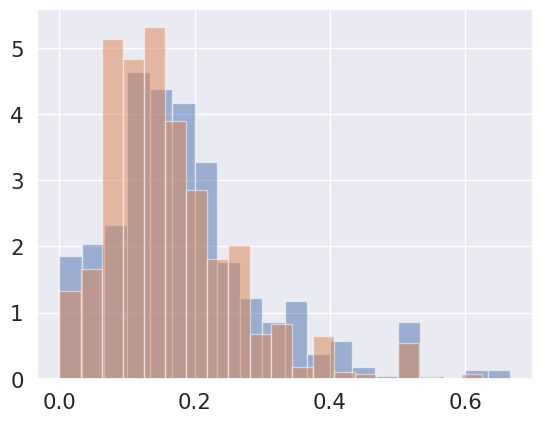

In [226]:
data['type']= data["Clasificacion"].replace(["LLM","Human"],[1,0])


plt.hist(data[(data["type"]==0)]["numero_puntuacion/texto"], bins=20, density=True, alpha=0.5, label='0')
plt.hist(data[(data["type"]==1)]["numero_puntuacion/texto"], bins=20, density=True, alpha=0.5, label='1')




([<matplotlib.axis.XTick at 0x7f3f20e5fb50>,
 [Text(1, 0, 'Human'), Text(2, 0, 'LLM')])

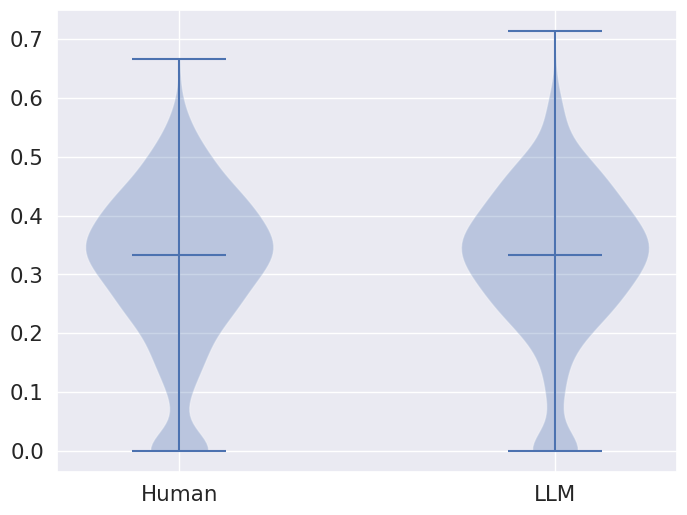

In [227]:
plt.figure(figsize=(8, 6))
plt.violinplot([data[(data["type"]==0)]["stop_words/texto"], data[(data["type"]==1)]["stop_words/texto"]], showmedians=True)
plt.xticks([1, 2], ['Human', 'LLM'])

In [228]:
data.sort_values("numero_palabras")

,Texto,Tipo de fuente,Clasificacion,type,numero_palabras,numero_stopwords,numero_palabras_unicas,numero_puntuacion,stop_words/texto,numero_palabras_unicas/texto,numero_puntuacion/texto
2722,duquederrochon,Tweets,LLM,1,1,0,1,0,0.000000,1.000000,0.000000
628,vanessayoestoyviendo,Tweets,Human,0,1,0,1,0,0.000000,1.000000,0.000000
3311,carpetassecretas,Tweets,LLM,1,1,0,1,0,0.000000,1.000000,0.000000
784,itslocombianotcolombia,Tweets,Human,0,1,0,1,0,0.000000,1.000000,0.000000
625,vanessaalejandrosanzes,Tweets,Human,0,1,0,1,0,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
1388,@lcvelez: hechos: - @avianca si paga impuestos...,Tweets,Human,0,35,9,27,9,0.257143,0.771429,0.257143
2812,rt @s_dumit: historias de balcón: el niño del ...,Tweets,LLM,1,35,14,30,6,0.400000,0.857143,0.171429
1276,"@noticiasrcn: ""los niños, a partir del 11 de m...",Tweets,Human,0,35,13,29,5,0.371429,0.828571,0.142857
3745,la formación técnica y tecnológica es clave pa...,Tweets,LLM,1,35,19,29,2,0.542857,0.828571,0.057143


In [229]:
data["Tipo de fuente"].unique()

array(['Tweets'], dtype=object)

In [230]:
#EDA
#Mayusculas
#Frequencia en palabras
#Puntuación



In [231]:
def procesar_texto(texto):
    tokens = word_tokenize(texto)
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(tokens)

data['texto_procesado'] = data['Texto'].apply(procesar_texto)

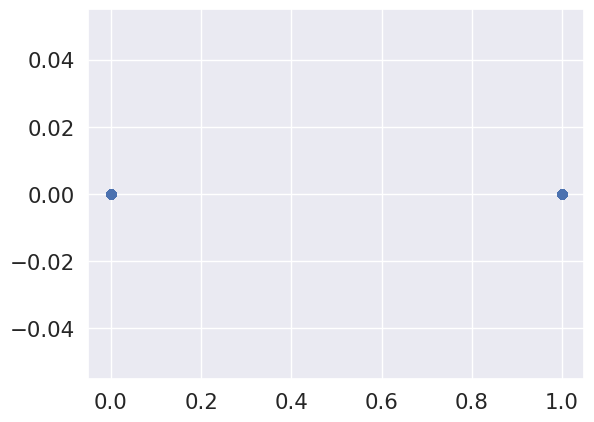

In [232]:
df_human=data[data["Clasificacion"]=="Human"]
df_llm=data[data["Clasificacion"]=="LLM"]



def contar_palabras_mayusculas(texto):
    palabras_con_mayusculas = [palabra for palabra in texto.split() if any(letra.isupper() for letra in palabra)]
    return len(palabras_con_mayusculas)

data['conteo_palabras_mayusculas'] = data['Texto'].apply(contar_palabras_mayusculas)
data['type']= data["Clasificacion"].replace(["LLM","Human"],[1,0])


plt.scatter(data['type'],data['conteo_palabras_mayusculas'] )


In [233]:
data



,Texto,Tipo de fuente,Clasificacion,type,numero_palabras,numero_stopwords,numero_palabras_unicas,numero_puntuacion,stop_words/texto,numero_palabras_unicas/texto,numero_puntuacion/texto,texto_procesado,conteo_palabras_mayusculas
554,sobre este aporte voluntario adicional por la ...,Tweets,Human,0,18,8,18,1,0.444444,1.000000,0.055556,aporte voluntario adicional servicios públicos...,0
555,en medellín está circulando un video por whats...,Tweets,Human,0,19,10,16,0,0.526316,0.842105,0.000000,medellín circulando video whatsapp aporte volu...,0
556,un nuevo capítulo hoy acerca del debate sobre ...,Tweets,Human,0,21,9,20,0,0.428571,0.952381,0.000000,nuevo capítulo hoy acerca debate si congreso r...,0
557,@leydelmontes: “¿en qué momento el carnaval co...,Tweets,Human,0,26,9,24,4,0.346154,0.923077,0.153846,leydelmontes momento carnaval toda alegría des...,0
558,en esta intervención el senador @antoniosangui...,Tweets,Human,0,19,10,18,1,0.526316,0.947368,0.052632,intervención senador antoniosanguino expone ma...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3833,la educación cívica es fundamental para la con...,Tweets,LLM,1,24,11,19,2,0.458333,0.791667,0.083333,educación cívica fundamental construcción soci...,0
3839,la corrupción es una amenaza para la democraci...,Tweets,LLM,1,26,12,22,2,0.461538,0.846154,0.076923,corrupción amenaza democracia desarrollo país ...,0
3841,el sistema político necesita una reforma profu...,Tweets,LLM,1,29,12,23,2,0.413793,0.793103,0.068966,sistema político necesita reforma profunda gar...,0
3844,la violencia y la delincuencia son una amenaza...,Tweets,LLM,1,32,16,24,2,0.500000,0.750000,0.062500,violencia delincuencia amenaza seguridad ciuda...,0


In [234]:
import string
def contar_signos_puntuacion(texto):
    cantidad_signos = len([c for c in texto.split() if c in string.punctuation])

    return cantidad_signos

data['conteo_signos_puntuacion'] = data['Texto'].apply(contar_signos_puntuacion)



In [235]:
puntuacion_human=data[data["Clasificacion"]=="Human"]['conteo_signos_puntuacion'].sum()
puntuacion_llm=data[data["Clasificacion"]=="LLM"]['conteo_signos_puntuacion'].sum()

print(puntuacion_human)
print(puntuacion_llm)

125
120


In [236]:
data

,Texto,Tipo de fuente,Clasificacion,type,numero_palabras,numero_stopwords,numero_palabras_unicas,numero_puntuacion,stop_words/texto,numero_palabras_unicas/texto,numero_puntuacion/texto,texto_procesado,conteo_palabras_mayusculas,conteo_signos_puntuacion
554,sobre este aporte voluntario adicional por la ...,Tweets,Human,0,18,8,18,1,0.444444,1.000000,0.055556,aporte voluntario adicional servicios públicos...,0,0
555,en medellín está circulando un video por whats...,Tweets,Human,0,19,10,16,0,0.526316,0.842105,0.000000,medellín circulando video whatsapp aporte volu...,0,0
556,un nuevo capítulo hoy acerca del debate sobre ...,Tweets,Human,0,21,9,20,0,0.428571,0.952381,0.000000,nuevo capítulo hoy acerca debate si congreso r...,0,0
557,@leydelmontes: “¿en qué momento el carnaval co...,Tweets,Human,0,26,9,24,4,0.346154,0.923077,0.153846,leydelmontes momento carnaval toda alegría des...,0,0
558,en esta intervención el senador @antoniosangui...,Tweets,Human,0,19,10,18,1,0.526316,0.947368,0.052632,intervención senador antoniosanguino expone ma...,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3833,la educación cívica es fundamental para la con...,Tweets,LLM,1,24,11,19,2,0.458333,0.791667,0.083333,educación cívica fundamental construcción soci...,0,0
3839,la corrupción es una amenaza para la democraci...,Tweets,LLM,1,26,12,22,2,0.461538,0.846154,0.076923,corrupción amenaza democracia desarrollo país ...,0,0
3841,el sistema político necesita una reforma profu...,Tweets,LLM,1,29,12,23,2,0.413793,0.793103,0.068966,sistema político necesita reforma profunda gar...,0,0
3844,la violencia y la delincuencia son una amenaza...,Tweets,LLM,1,32,16,24,2,0.500000,0.750000,0.062500,violencia delincuencia amenaza seguridad ciuda...,0,0


In [237]:
df_llm['conteo_palabras_mayusculas'].sum()


KeyError: 'conteo_palabras_mayusculas'

In [ ]:
df_human['conteo_palabras_mayusculas'].sum()

34825

In [ ]:
most_cuerrent_words_human=pd.Series(' '.join(df_human['texto_procesado']).lower().split()).value_counts()[:100]
most_cuerrent_words_llm=pd.Series(' '.join(df_llm['texto_procesado']).lower().split()).value_counts()[:100]

In [ ]:
print(df_human.shape)
print(df_llm.shape)

(1934, 5)
(1914, 5)
